Twitter Sentiments Analysis

Scrapping the Tweet <br/>
Use webscrapping method if you want analysise small amout of tweets <br/>
Use Snscrapping library Method if you want to analyise Large amount of tweet


In [2]:
#Webscrapping method
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import getpass
pd.options.display.max_colwidth = 1000


In [ ]:
my_user="naqeeb2710"
my_pass=getpass.getpass()


In [ ]:
search_item="Ronaldo"

In [ ]:
path="C:\Program Files\driver\chromedriver.exe"
driver=webdriver.Chrome(path)
driver.get("https://twitter.com/i/flow/login")
sleep(3)

In [ ]:
user_id=driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.RETURN)

In [ ]:
password=driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.RETURN)


Scrap Tweets

In [ ]:
search_box=driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.RETURN)

In [ ]:
all_tweets=set()
tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")

while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)
    tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>250:
        break

all_tweets=list(all_tweets)
df=pd.DataFrame(all_tweets,columns=["Tweets"])
df.head()
    

Snscrape Method

In [1]:
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import snscrape.modules.twitter as sntwitter

query="Ronaldo"
tweets=[]
limit=3000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if(len(tweets)==limit):
        break
    else:
        tweets.append([tweet.content])

df=pd.DataFrame(tweets,columns=['Tweets'])
# print(df)
df.to_csv("Tweets.csv") 



c:\Users\naqee\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Cleaning The Tweets

In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stp_words=stopwords.words('english')
def clean_tweet(tweet): 
    cleanTweet=re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet=re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet=" ".join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet 


def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet>0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [4]:
df['CleanTweets']=df['Tweets'].apply(clean_tweet)
df['Polarity']=df['CleanTweets'].apply(calPolarity)
df['Subjectivity']=df['CleanTweets'].apply(calSubjectivity)
df['Segmentation']=df['Polarity'].apply(segmentation)
df.head()
df.to_csv('CleanedTweets.csv')
df.shape

(3000, 5)

Analysing And Visulaing The Data

In [5]:
df=pd.read_csv('CleanedTweets.csv')
df.pivot_table(index=['Segmentation'],aggfunc={'Segmentation':'count'})

,Segmentation
Segmentation,
negative,237
neutral,2178
positive,585


In [6]:
#Top three positive Tweets
df.sort_values(by=['Polarity'],ascending=False).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
1714,1714,@thedefiedge Ronaldo from 96 to 98 was the bes...,Ronaldo 96 98 best ever seen football field.,1.0,0.3,positive
2137,2137,The best player in the world post Messi/Ronald...,The best player world post Messi/Ronaldo me… h...,1.0,0.3,positive
1826,1826,The best player you played against? \n\nPickfo...,The best player played against? Pickford: Cris...,1.0,0.3,positive


In [7]:
#Top three negative Tweets
df.sort_values(by=['Polarity'],ascending=True).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
2607,2607,@victorosimhen9 I think it's disgusting for yo...,I think disgusting allow use swap Ronaldo.,-1.0,1.0,negative
1084,1084,@BarcelonaTrey12 Messi and Ronaldo fc are the ...,Messi Ronaldo fc worst closely followed Disney fc,-1.0,1.0,negative
2454,2454,@UtdPlug @carlolaudisa I can't stand Ronaldo b...,I can't stand Ronaldo even I want anybody stay...,-1.0,1.0,negative


In [8]:
#Neutral Tweets
df[df.Polarity==0].head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
1,1,@ronaldo_mb_dhf Pawankalyan family ki two whee...,_mb_dhf Pawankalyan family ki two wheeler sari...,0.0,0.0,neutral
2,2,🇧🇷🇧🇷\n\n#psv #romario #ronaldonazario @Romario...,🇧🇷🇧🇷 ://t.co/luQaJrsfmY,0.0,0.0,neutral
5,5,@Roar__45 @ReddyPata @uday462 @ronaldo_mb_dhf ...,__45 _mb_dhf 4/20 fulls 🤣🤣 https://t.co/IUQKPq...,0.0,0.0,neutral


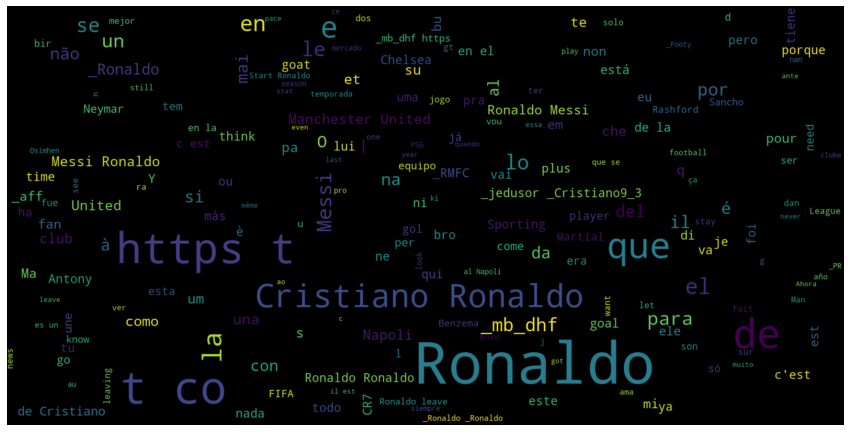

In [10]:
consolidated=' '.join(word for word in df['CleanTweets'][df['Polarity']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


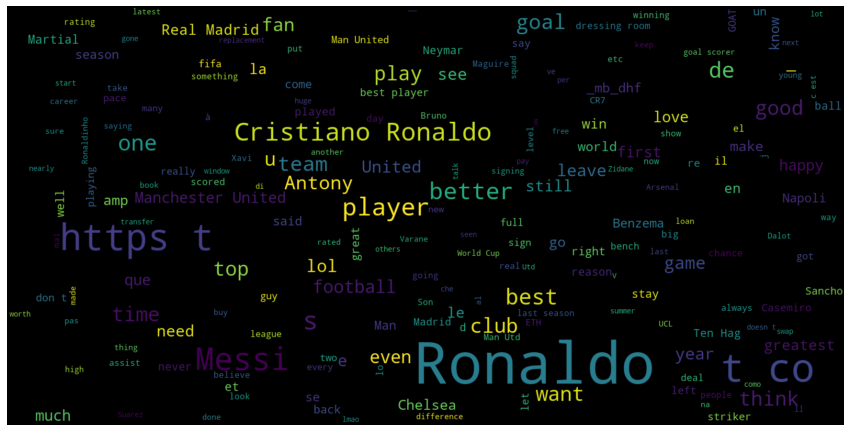

In [11]:
#Frequent +ve Words Visualization
positiveWords=' '.join(word for word in df['CleanTweets'][df['Polarity']>0])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positiveWords),interpolation='bilinear')
plt.axis('off')
plt.show()


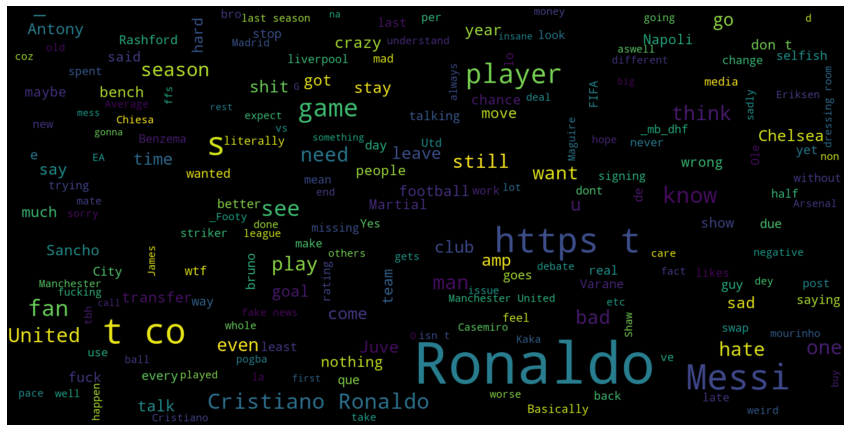

In [12]:
#frequent -ve words
NegativeWords=' '.join(word for word in df['CleanTweets'][df['Polarity']<0])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(NegativeWords),interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

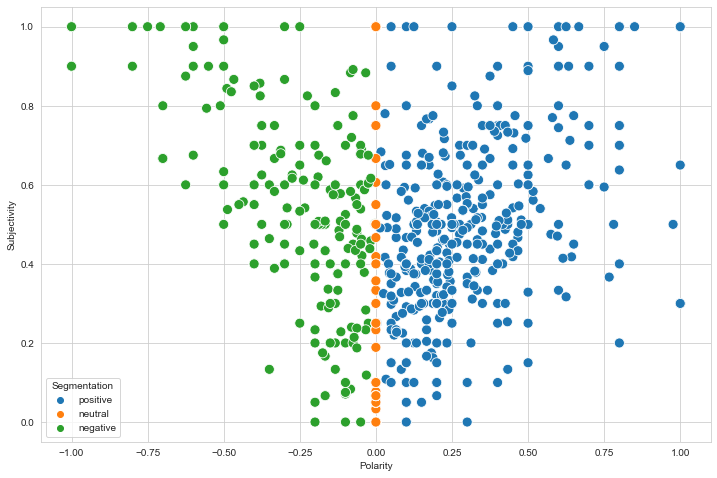

In [13]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x="Polarity",y="Subjectivity",data=df,s=100,hue="Segmentation",legend='full')

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

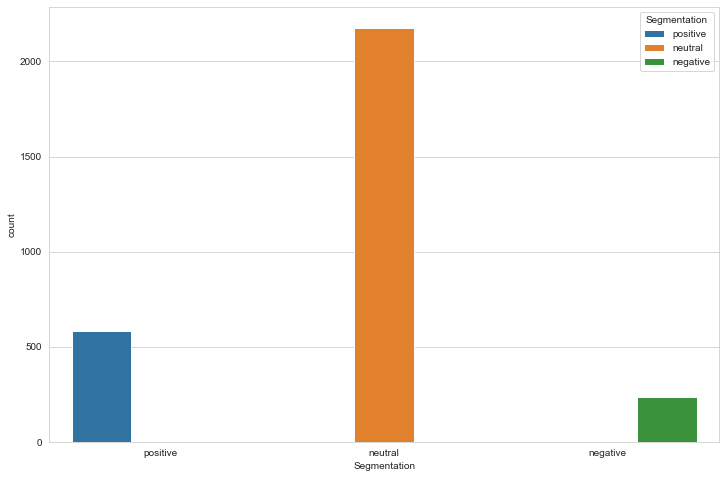

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Segmentation',data=df,hue='Segmentation')

In [15]:
positive=round(len(df[df.Segmentation=='positive'])/len(df)*100,2)
negative=round(len(df[df.Segmentation=='negative'])/len(df)*100,2)
neutral=round(len(df[df.Segmentation=='neutral'])/len(df)*100,2)

result=[positive,negative,neutral]
pd.DataFrame(result,index=['Positive','Negative','Neutral'])

,0
Positive,19.5
Negative,7.9
Neutral,72.6


In [16]:
#extract the hashtags from the tweets
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags


In [17]:
ht_positive=hashtag_extract(df[df.Segmentation=='positive']['Tweets'])
ht_negative=hashtag_extract(df[df.Segmentation=='negative']['Tweets'])
ht_neutral=hashtag_extract(df[df.Segmentation=='neutral']['Tweets'])
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])
ht_neutral=sum(ht_neutral,[])


In [18]:
freq_positive=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq_positive.keys()),'Count':list(freq_positive.values())})
d.head()


,Hashtag,Count
0,realmadrid,1
1,Benzema,1
2,kaka,1
3,cristianoronaldo,1
4,Football,4


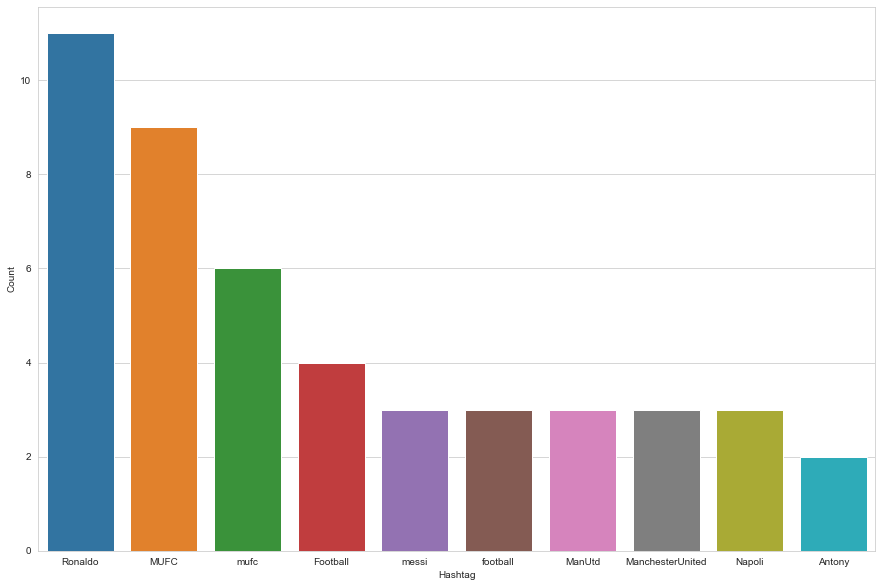

In [19]:
#Positive Hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [20]:
freq_negative=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq_negative.keys()),'Count':list(freq_negative.values())})
d.head()

,Hashtag,Count
0,Cristiano,1
1,ManUtd,1
2,ManchesterUnited,1
3,media,1
4,Ronaldo,4


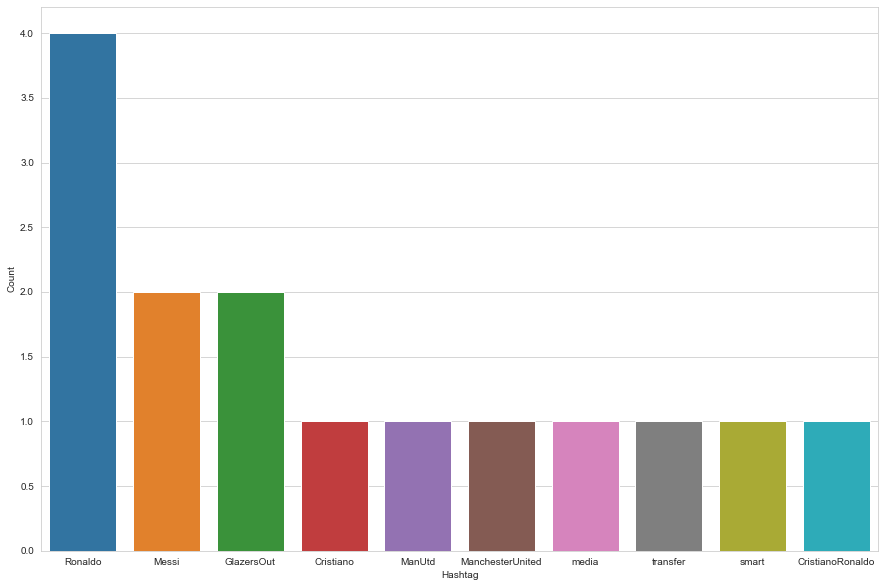

In [21]:
#Negative Hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [22]:
freq_neutral=nltk.FreqDist(ht_neutral)
d=pd.DataFrame({'Hashtag':list(freq_neutral.keys()),'Count':list(freq_neutral.values())})


c:\Users\naqee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


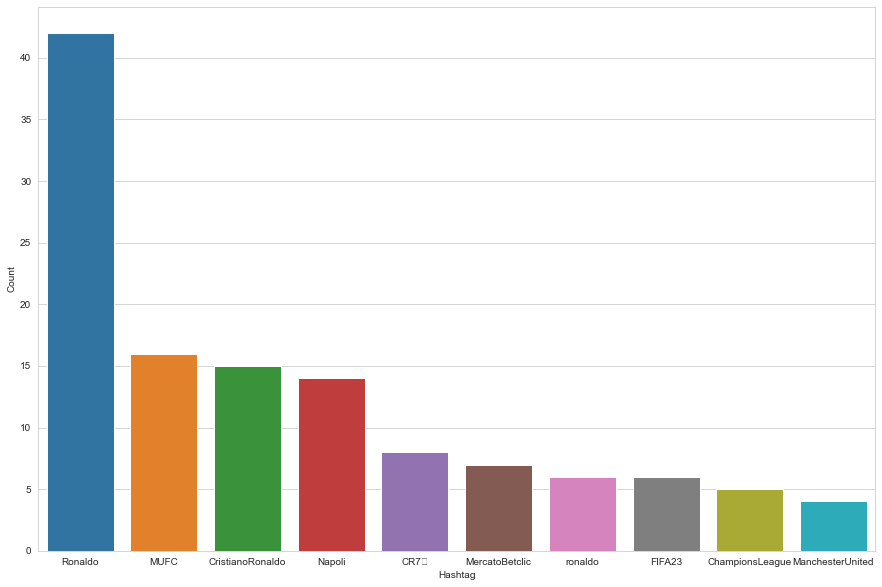

In [23]:
#Neutral HAsthtags
d=d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

INPUT SPILIT

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
df['CleanTweets'] = df['CleanTweets'].fillna(' ')
bow=bow_vectorizer.fit_transform(df['CleanTweets'])

In [25]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(bow,df['Segmentation'],test_size=0.25 ,random_state=42)

MODEL TRAINING

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score


In [28]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
#testing the model
pred=model.predict(x_test)
# f1_score(y_test,pred)

In [30]:
accuracy_score(y_test,pred)

0.832